# Ordenamiento de *Clientes Potenciales*.

Se ha consolidado la Información desde el 2019 al 2022, de las vistas realizadas por las consultoras.

**El proyecto pretende ordenar los clientes en orden de mayor probabilidad de Compra.**

![Logo Nutriendo](imagenes/logo_nutriendo.png)

## Código

### [https://github.com/cajivar/BootCamp_Proyecto2023_CF](https://github.com/cajivar/BootCamp_Proyecto2023_CF)

## Dataset

Este dataset es propiedad de Laboratorios Nutriendo SAS [Clientes Visitados Data Set]



## Solución  

La empresa tiene información de clientes anteriores que en algún momento han sido contactados en el pasado comprar la inversión en el pasado sin importar si lo compraron o no. Esta información está contenida en el archivo `train.csv`.

Así mismo, para ayudarte hay un archivo llamado `test.csv` con datos de otros clientes pero que deberás usar para probar tus resultados.

**Como no tenemos más información más allá de si un cliente compró o no compró, vamos a utilizar las probabilidades que nos de un modelo de clasificación para decidir quién tiene más probabilidades de convertir**.

Este problema se conoce como *lead scoring*.

### Descripción de los datos

| Variable     | Definición                                                              |
|--------------|-------------------------------------------------------------------------|
| *ID*         | Identificador tabla                                         |
| *Empresa*        | Edad del cliente                                                        |
| *Nombre*        | Nombre del cliente                                        |
| *Sexo*    | Sexo del cliente                                              |
| *Fec_Nac*  | Fecha Nacimiento del cliente                                          |
| *Identificacion*    | Numero documento identidad                      |
| *telefono*    | Telefono contacto del cliente                                        |
| *Company*    | Empresa de trabajo de la visita al cliente                    |
| *Job*       | Ocupación del cliente                         |
| *Email*    | correo electronico del cliente                |
| *Addres*      | Direccion residencia del cliente                                 |
| *Comentario*        | Observaciones de Salu del Cliente                                 |
| *Height*   | Altura del cliente                                    |
| *Weight*   | Peso del cliente |
| *IMC*      | Indice de Masa Muscular Calculado            |
| *Estado*   | Clasificacion segun el IMC del cliente   |
| *Result*   | Observaciones de la prueba del scanner |
| *Fecha* | Feha de la Prueba    |
| *Edad* | Edad del cliente    |
| *Compra* | Si el cliente compro como resultado de la campaña    |
| *Año* | Año de la visita    |


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [4]:
df = pd.read_csv('./data/Data_Nut_2019-2022.csv')

In [5]:
df

,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
0,1,ACROPOLIS,JULY TATIANA APARICIO SEPULVEDA,Femenino,4/09/1993,1098746059,3134308590,SANTANDER BUCARAMANGA,ANALISTA DE CETECCION,tatiana-9324@hotmail.com,...,163,53,19.9,bajo peso,Peso corporal estándar,4,15/01/2019,25,SI,2019
1,2,ACROPOLIS,LUIS EVELIO GARCIA ACOSTA,Masculino,28/10/1964,91752482,3124227618,SEGURIDAD ACROPOLIS,VIGILANTE,luiseve@hotmail.com,...,164,72,26.8,Sobrepeso,Grasa parcial severa,6,15/01/2019,54,SI,2019
2,3,ACROPOLIS,GERMAN FERNANDO PARRA,Masculino,6/04/1982,91508362,3177014657,SEGURIDAD ACROPOLIS,TECNICO MEDIOS TECNOLOGICOS,gfpc06@hotmail.com,...,165,71,26.1,Sobrepeso,Peso corporal estándar,6,15/01/2019,36,NO,2019
3,4,ACROPOLIS,BREICY JASBLEIDY CHIGUARA,Femenino,20/08/1983,93878669,3214802273,SANTANDER,OFICIOS GENERALES,BREICUJASBELIDYCHIGUANA@GMAIL.COM,...,152,93,40.3,Obesidad Morbida,Grasa parcial severa,4,15/01/2019,35,NO,2019
4,5,ACROPOLIS,julio cesar galvis,Masculino,26/08/1988,37874511,3125694228,santander,NaN,NaN,...,170,70,24.2,normal,Ligeramente por encima del peso normal,4,15/01/2019,30,NO,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47322,47323,DOMICILIARIA 29/12/2022,DEYBI MERCHAN,Masculino,4/09/1974,91476749,3143599901,TA 109/64MMHG FC67,ACESOR COMERCIAL,deybi.merchan@esab.com.co,...,180,87,26.9,Sobrepeso,Grasa parcial severa,9,8/01/2023,48,SI,2022
47323,47324,DOMICILIARIA 29/12/2022,YADIS HERNANDEZ CONTRERAS,Femenino,16/04/1974,63463542,3125898384,TA 132/67MMHG FC69,AMA DE CASA,NaN,...,159,86,34.0,Obesidad_1,Grasa parcial severa,9,8/01/2023,48,NO,2022
47324,47325,DOMICILIARIA 30/12/2022,JOHANA ARENAS,Femenino,13/05/1988,1094829015,3185294134,TA 108/68MMHG FC68,CONTADORA,johanarenas1305@gmail.com,...,152,55,23.8,normal,Ligeramente por encima del peso normal,9,8/01/2023,34,SI,2022
47325,47326,DOMICILIARIA 31122022,CRISTHIAN ALEXANDER BARAJAS,Masculino,21/07/1992,1098724539,3134290742,TA 159/91MMHG FC58,CONDUCTOR,cristhianbaragas2107@gmail.com,...,176,133,42.9,Obesidad Morbida,Grasa parcial severa,9,8/01/2023,30,SI,2022


In [6]:
df.dtypes

ID                  int64
Empresa            object
Nombre             object
Sexo               object
Fec_Nac            object
Identificacion     object
telefono           object
Company            object
Job                object
Email              object
Address            object
Comentario         object
Height              int64
Weight              int64
IMC               float64
Estado             object
Result             object
Consultor           int64
Fecha              object
Edad                int64
Compra             object
Año                 int64
dtype: object

In [7]:
print(df.shape)
print(type(df.shape))

(47327, 22)
<class 'tuple'>


In [8]:
df['Compra'].unique()

array(['SI', 'NO'], dtype=object)

In [9]:
df['telefono'] = df['telefono'].astype('object')
df['Company'] = df['Company'].astype('object')

In [10]:
df

,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
0,1,ACROPOLIS,JULY TATIANA APARICIO SEPULVEDA,Femenino,4/09/1993,1098746059,3134308590,SANTANDER BUCARAMANGA,ANALISTA DE CETECCION,tatiana-9324@hotmail.com,...,163,53,19.9,bajo peso,Peso corporal estándar,4,15/01/2019,25,SI,2019
1,2,ACROPOLIS,LUIS EVELIO GARCIA ACOSTA,Masculino,28/10/1964,91752482,3124227618,SEGURIDAD ACROPOLIS,VIGILANTE,luiseve@hotmail.com,...,164,72,26.8,Sobrepeso,Grasa parcial severa,6,15/01/2019,54,SI,2019
2,3,ACROPOLIS,GERMAN FERNANDO PARRA,Masculino,6/04/1982,91508362,3177014657,SEGURIDAD ACROPOLIS,TECNICO MEDIOS TECNOLOGICOS,gfpc06@hotmail.com,...,165,71,26.1,Sobrepeso,Peso corporal estándar,6,15/01/2019,36,NO,2019
3,4,ACROPOLIS,BREICY JASBLEIDY CHIGUARA,Femenino,20/08/1983,93878669,3214802273,SANTANDER,OFICIOS GENERALES,BREICUJASBELIDYCHIGUANA@GMAIL.COM,...,152,93,40.3,Obesidad Morbida,Grasa parcial severa,4,15/01/2019,35,NO,2019
4,5,ACROPOLIS,julio cesar galvis,Masculino,26/08/1988,37874511,3125694228,santander,NaN,NaN,...,170,70,24.2,normal,Ligeramente por encima del peso normal,4,15/01/2019,30,NO,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47322,47323,DOMICILIARIA 29/12/2022,DEYBI MERCHAN,Masculino,4/09/1974,91476749,3143599901,TA 109/64MMHG FC67,ACESOR COMERCIAL,deybi.merchan@esab.com.co,...,180,87,26.9,Sobrepeso,Grasa parcial severa,9,8/01/2023,48,SI,2022
47323,47324,DOMICILIARIA 29/12/2022,YADIS HERNANDEZ CONTRERAS,Femenino,16/04/1974,63463542,3125898384,TA 132/67MMHG FC69,AMA DE CASA,NaN,...,159,86,34.0,Obesidad_1,Grasa parcial severa,9,8/01/2023,48,NO,2022
47324,47325,DOMICILIARIA 30/12/2022,JOHANA ARENAS,Femenino,13/05/1988,1094829015,3185294134,TA 108/68MMHG FC68,CONTADORA,johanarenas1305@gmail.com,...,152,55,23.8,normal,Ligeramente por encima del peso normal,9,8/01/2023,34,SI,2022
47325,47326,DOMICILIARIA 31122022,CRISTHIAN ALEXANDER BARAJAS,Masculino,21/07/1992,1098724539,3134290742,TA 159/91MMHG FC58,CONDUCTOR,cristhianbaragas2107@gmail.com,...,176,133,42.9,Obesidad Morbida,Grasa parcial severa,9,8/01/2023,30,SI,2022


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['Compra'])

In [13]:
print(df_train.shape)
print(type(df_train.shape))
df_train.head()

(33128, 22)
<class 'tuple'>


,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
33492,33493,DISTRIMARKS DE COLOMBIA OPERATIVO,YERSON ANDRES NAVARRO MEDINA,Masculino,20/07/1997,1232888550,3506900340,T/A: 130/81 MMHG FC: 78,361,andressnavarro20@hotmail.com,...,184,65,19.2,bajo peso,Peso inferior leve,6,20/09/2021,24,NO,2021
33513,33514,DELFONCE COMERCIAL BUCARAMANGA,RODOLFO LOPEZ CARREÑO,Masculino,5/12/1979,13538173,3107882090,T/A:126/82 MMHG FC: 72,359,rodolfolopezcarreno@gmail.com,...,171,78,26.7,Sobrepeso,Grasa parcial severa,6,20/09/2021,41,SI,2021
2768,2769,freskaleche barranca,NORALBA OSORIO CALDERON,Femenino,7/10/1985,1098637185,3219219514,BARRANCA-SANTANDER,MERCADERISTA-COMERCIAL,noritacalderon24@hotmail.com,...,165,54,19.8,bajo peso,Peso corporal estándar,5,15/02/2019,33,SI,2019
11836,11837,BRINKS OPERATIVO RIOHACHA,JAIDER JOSE PIMIENTA TRILLOS,Masculino,8/02/1968,84033188,3004434537,GUAJIRA,JEFE DE TRIPULACION,jaiderpimienta81@gmail.com,...,170,87,30.1,Obesidad_1,Grasa parcial severa,10,15/08/2019,51,SI,2019
13996,13997,SALUD MIA EPS COMERCIAL BUCARAMANGA,INGRID MARCELA QUINTERO SANCHEZ,Femenino,20/06/1992,1098723645,3192855429,SANTANDER,ASESOR COMERCIAL,marcelaquintero1502@gmail.com,...,157,71,28.8,Sobrepeso,Grasa parcial severa,5,15/09/2019,27,SI,2019


In [14]:
print(df_test.shape)
print(type(df_test.shape))
df_test.head()

(14199, 22)
<class 'tuple'>


,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
29278,29279,SEVICOL OPERATIVO CENTRO,ANTONIO JESUS FRANCO ROMERO,Masculino,28/09/1975,91444358,3213731234,SUPERVISOR,36,anfranco28@hotmail.com,...,170,82,28.4,Sobrepeso,Grasa parcial severa,7,30/04/2021,45,SI,2021
12652,12653,AVINSA OPE,NELSON ORLANDO QUINTERO SERRANO,Masculino,14/06/1991,1104184560,3228993814,FLORIDA,OPER-SUPERNUMERARIO,NaN,...,168,68,24.1,normal,Peso corporal estándar,8,15/08/2019,28,NO,2019
33191,33192,INACAR ADMINISTRATIVO,YEISON CORDERO MARTINEZ,Masculino,5/10/1992,1051742452,3165584496,T/A 130/79MMHG FC: 76,36,yeisoncorderomartinez3@gmail.com,...,173,70,23.4,normal,Peso corporal estándar,14,13/09/2021,28,SI,2021
47122,47123,TRANSSANDER SA ADMINISTRATIVO 5122022,ADAN SUAREZ,Masculino,23/12/1990,1005154910,3178791929,TA 105/62MMHG FC78,AUXILIAR ADMINISTRATIVO,NaN,...,154,69,29.1,Sobrepeso,Grasa parcial severa,9,20/12/2022,31,NO,2022
42360,42361,CLINICA SAN JOSE ADMINISTRATIVOS 26-7-2022,TANIA DIAZ VARGAS,Femenino,4/05/1998,1018502960,3214772194,T/A 112/60MMHG - FC 76,ADMINISTRATIVO,taniadiazvargas0110@gmail.com,...,160,53,20.7,normal,Peso corporal estándar,7,3/08/2022,24,SI,2022


In [15]:
df_train.info()
df_train.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33128 entries, 33492 to 13774
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              33128 non-null  int64  
 1   Empresa         33128 non-null  object 
 2   Nombre          33128 non-null  object 
 3   Sexo            33128 non-null  object 
 4   Fec_Nac         33128 non-null  object 
 5   Identificacion  31774 non-null  object 
 6   telefono        33128 non-null  object 
 7   Company         31932 non-null  object 
 8   Job             32557 non-null  object 
 9   Email           25766 non-null  object 
 10  Address         27181 non-null  object 
 11  Comentario      27721 non-null  object 
 12  Height          33128 non-null  int64  
 13  Weight          33128 non-null  int64  
 14  IMC             33128 non-null  float64
 15  Estado          33128 non-null  object 
 16  Result          33090 non-null  object 
 17  Consultor       33128 non-n

ID                  int64
Empresa            object
Nombre             object
Sexo               object
Fec_Nac            object
Identificacion     object
telefono           object
Company            object
Job                object
Email              object
Address            object
Comentario         object
Height              int64
Weight              int64
IMC               float64
Estado             object
Result             object
Consultor           int64
Fecha              object
Edad                int64
Compra             object
Año                 int64
dtype: object

In [16]:
df_train.sample(5)

,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
1007,1008,CAJASAN TERCERA EDAD,ANGELA RINCON MARTINEZ,Femenino,26/03/1950,37803294,3166295061,santander cajasan,disfrutemos juntos grupo 3,NaN,...,148,50,22.8,normal,Peso corporal estándar,6,15/01/2019,68,NO,2019
18089,18090,MULTINSA ADM BARRANCA,DERLY ROCIO ALDANA AHUMADO,Femenino,27/09/1982,52960724,3133087124,COORDINADORA TH,36,talentohumano@multinsa.com,...,158,60,24.0,normal,Ligeramente por encima del peso normal,6,15/12/2019,38,NO,2019
20653,20654,ANDES GROUP SAS ADMINISTRATIVO BUCARAMANGA,MONICA LILIANA QUINTERO PACHECO,Femenino,2/12/1989,1098680590,3158908757,BUCARAMANGA,ADMINISTRATIVO-JEFE DE ALMACEN,monicalilianaquintero@hotmail.com,...,167,64,22.9,normal,Peso corporal estándar,8,24/02/2020,30,NO,2020
5682,5683,MEDIIMPLANTES OPERATIVO,ESNEYDER DAVID MONROY BASTO,Masculino,3/10/1994,1098761149,3202258527,SANTANDER-BUCARAMNGA,OPERARIO,esneyder1003@gmail.com,...,182,114,34.4,Obesidad_1,Grasa parcial severa,7,15/04/2019,24,SI,2019
20188,20189,INDUNILO OPERATIVO BUCARAMANGA,GERMAN AUGUSTO DUARTE SERRANO,Masculino,11/05/1990,1098689133,3132019617,SANTANDER,OPERADOR DE MONTACARGA,germanduartes22@gmail.com,...,176,81,26.1,Sobrepeso,Grasa parcial severa,10,11/02/2020,29,SI,2020


In [17]:
print(df_train.shape)
print(type(df_train.shape))

(33128, 22)
<class 'tuple'>


In [18]:
from pandas_profiling import ProfileReport
import seaborn as sns

In [19]:
profile = ProfileReport(df_train, title='Analisis de Compras sin Procesar', explorative=True)
profile.to_file('reporte_visitas.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\cajiv\OneDrive\env_python\cienciadatos\Proyecto_Final\PF\BootCamp_Proyecto2023_CF\env\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Distribución de la Variable Compra\nNo: 21573 (65.12%) | Si: 11555 (34.88%) ')

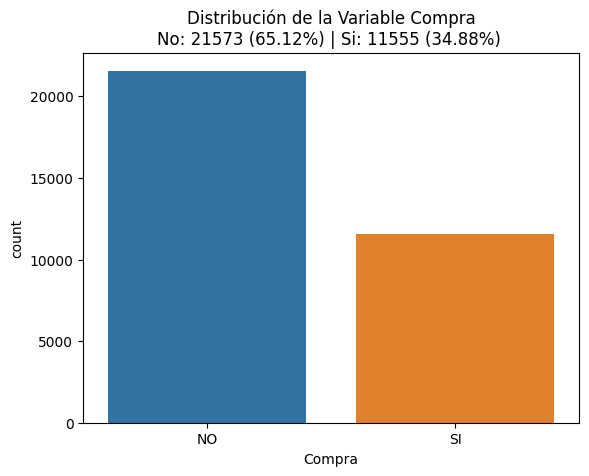

In [20]:
%matplotlib inline

compra_proportion = (df_train['Compra'].value_counts()).to_dict()
ax = sns.countplot(x=df_train["Compra"])
title = ("Distribución de la Variable Compra\n"
    f"No: {compra_proportion['NO']} ({(compra_proportion['NO']/len(df_train)):0.2%}) |"
    f" Si: {compra_proportion['SI']} ({(compra_proportion['SI']/len(df_train)):0.2%}) " )
ax.set_title(title)




In [21]:
df_train.drop(['ID'], axis='columns', inplace=True)
df_train.drop(['Company'], axis='columns', inplace=True)
df_train.drop(['Job'], axis='columns', inplace=True)
df_train.drop(['Comentario'], axis='columns', inplace=True)


In [22]:
df_train = df_train.drop(df_train[df_train['Height']>210].index)
df_train = df_train.drop(df_train[df_train['Height']<120].index)
df_train = df_train.drop(df_train[df_train['Weight']>140].index)
df_train = df_train.drop(df_train[df_train['Weight']<30].index)

feature engineering

In [23]:
df_train

,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Email,Address,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
33492,DISTRIMARKS DE COLOMBIA OPERATIVO,YERSON ANDRES NAVARRO MEDINA,Masculino,20/07/1997,1232888550,3506900340,andressnavarro20@hotmail.com,98,184,65,19.2,bajo peso,Peso inferior leve,6,20/09/2021,24,NO,2021
33513,DELFONCE COMERCIAL BUCARAMANGA,RODOLFO LOPEZ CARREÑO,Masculino,5/12/1979,13538173,3107882090,rodolfolopezcarreno@gmail.com,95,171,78,26.7,Sobrepeso,Grasa parcial severa,6,20/09/2021,41,SI,2021
2768,freskaleche barranca,NORALBA OSORIO CALDERON,Femenino,7/10/1985,1098637185,3219219514,noritacalderon24@hotmail.com,CLLE 63 # 18D-22 BARRIO PARNASO,165,54,19.8,bajo peso,Peso corporal estándar,5,15/02/2019,33,SI,2019
11836,BRINKS OPERATIVO RIOHACHA,JAIDER JOSE PIMIENTA TRILLOS,Masculino,8/02/1968,84033188,3004434537,jaiderpimienta81@gmail.com,CLL 21 N 18-45 SAN MARTIN,170,87,30.1,Obesidad_1,Grasa parcial severa,10,15/08/2019,51,SI,2019
13996,SALUD MIA EPS COMERCIAL BUCARAMANGA,INGRID MARCELA QUINTERO SANCHEZ,Femenino,20/06/1992,1098723645,3192855429,marcelaquintero1502@gmail.com,CONJUNTO SAN ANGEL CASA F 20 BARRIO PALOMITAS ...,157,71,28.8,Sobrepeso,Grasa parcial severa,5,15/09/2019,27,SI,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24712,PROYECTOS Y SERVICIOS OPERATIVO,RAMIRO DE JESUS ROMERO,Masculino,18/03/1965,71661302,3208095460,rajero123@hotmail.com,CALLE 34 21-64 ANTONIA SANTOS,160,56,21.9,normal,Peso corporal estándar,5,2/12/2020,55,NO,2020
23385,DIATECO ADMINISTRATIVO BARRANCA,LIZBETH RIVERA RUBIO,Femenino,10/11/1979,28020205,3118010519,lisriver@hotmail.com,CRA 15 # 53B 41,155,57,23.7,normal,Ligeramente por encima del peso normal,8,23/10/2020,40,NO,2020
34755,PAPELERIA MACROVISTURI,CARLOS EDUARDO SANCHEZ MORA,Masculino,9/02/1982,88256127,3219848924,cesmora2000@hotmail.com,97,170,90,31.1,Obesidad_1,Grasa parcial severa,5,13/10/2021,39,SI,2021
10264,BRINKS ADMINISTRACION GENERAL BOGOTA,LAURA PATRICIA GARCIA PALOMO,Femenino,7/02/1998,1233494747,3212774414,lauragarciapalomo45laura@gmail.com,DIAGONAL 4 SUR #23D 23 QUINTAS DE SANTANA,155,44,18.3,bajo peso,Peso inferior leve,11,15/07/2019,21,NO,2019


# One-Hot Encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder
estado_encoder = OneHotEncoder()

estado_encoder.fit(df_train[['Estado']])

OneHotEncoder()

In [25]:
encoded_estado = estado_encoder.transform(df_train[['Estado']])
encoded_estado.toarray()

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [26]:
encoded_estado = pd.DataFrame(encoded_estado.toarray(), columns=estado_encoder.categories_)
encoded_estado['original_value'] = df_train['Estado']
encoded_estado

,Obesidad Morbida,Obesidad_1,Obesidad_2,Sobrepeso,bajo peso,normal,original_value
0,0.0,0.0,0.0,0.0,1.0,0.0,bajo peso
1,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,1.0,0.0,NaN
3,0.0,1.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,1.0,0.0,0.0,normal
...,...,...,...,...,...,...,...
32980,0.0,0.0,0.0,0.0,0.0,1.0,NaN
32981,0.0,0.0,0.0,0.0,0.0,1.0,normal
32982,0.0,1.0,0.0,0.0,0.0,0.0,normal
32983,0.0,0.0,0.0,0.0,1.0,0.0,NaN


# Binning

In [27]:
from custom_transformers import CutTransformer

In [29]:
edad_bin = CutTransformer(bins = [0, 20, 30, 40, 50, 60, 1000], as_str=True)

In [30]:
edad_frame = df_train[['Edad']].copy()
edad_bin.fit(edad_frame[['Edad']])

edad_encoded = edad_bin.fit_transform(edad_frame[['Edad']])
edad_frame['edad_encoded'] = edad_encoded

In [31]:
edad_frame

,Edad,edad_encoded
33492,24,"(20, 30]"
33513,41,"(40, 50]"
2768,33,"(30, 40]"
11836,51,"(50, 60]"
13996,27,"(20, 30]"
...,...,...
24712,55,"(50, 60]"
23385,40,"(30, 40]"
34755,39,"(30, 40]"
10264,21,"(20, 30]"


In [32]:
edad_one_hot_encoder = OneHotEncoder()

In [33]:
edad_one_hot_encoder.fit(edad_frame[['edad_encoded']])

OneHotEncoder()

In [34]:
edad_one_hot_encoder.transform(edad_frame[['edad_encoded']]).toarray()

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [35]:
oh_age = edad_one_hot_encoder.transform(edad_frame[['edad_encoded']]).toarray()

In [36]:
one_hot_encoded_edades = pd.DataFrame(
    oh_age,
    columns=edad_one_hot_encoder.categories_
)

In [38]:
pd.merge(edad_frame, one_hot_encoded_edades, left_index=True, right_index=True)

,Edad,edad_encoded,"((0, 20],)","((20, 30],)","((30, 40],)","((40, 50],)","((50, 60],)","((60, 1000],)"
2768,33,"(30, 40]",0.0,1.0,0.0,0.0,0.0,0.0
11836,51,"(50, 60]",0.0,0.0,0.0,0.0,0.0,1.0
13996,27,"(20, 30]",0.0,0.0,0.0,1.0,0.0,0.0
19343,23,"(20, 30]",0.0,1.0,0.0,0.0,0.0,0.0
514,33,"(30, 40]",0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
27617,43,"(40, 50]",0.0,0.0,0.0,0.0,1.0,0.0
24712,55,"(50, 60]",0.0,0.0,0.0,1.0,0.0,0.0
23385,40,"(30, 40]",0.0,0.0,1.0,0.0,0.0,0.0
10264,21,"(20, 30]",0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
weight_scaler = StandardScaler()

In [41]:
weight_scaled = df_train[['Weight']].copy()

In [42]:
weight_scaled['weight_scaled'] = weight_scaler.fit_transform(weight_scaled[['Weight']])

In [43]:
weight_scaled

,Weight,weight_scaled
33492,65,-0.529905
33513,78,0.366991
2768,54,-1.288818
11836,87,0.987920
13996,71,-0.115953
...,...,...
24712,56,-1.150834
23385,57,-1.081842
34755,90,1.194896
10264,44,-1.978739


## Convierte *"Masculino"* y *"Femenino"* a enteros

In [44]:
from custom_transformers import MasFemTransformer

mas_fem_transformer = MasFemTransformer()

In [51]:
sexo_frame = df_train[['Sexo']].copy()

In [52]:
sexo_frame[['sexo_mapeado']] = mas_fem_transformer.fit_transform(sexo_frame)

In [53]:
sexo_frame

,Sexo,sexo_mapeado
33492,Masculino,1
33513,Masculino,1
2768,Femenino,0
11836,Masculino,1
13996,Femenino,0
...,...,...
24712,Masculino,1
23385,Femenino,0
34755,Masculino,1
10264,Femenino,0


In [54]:
df_train

,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Email,Address,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
33492,DISTRIMARKS DE COLOMBIA OPERATIVO,YERSON ANDRES NAVARRO MEDINA,Masculino,20/07/1997,1232888550,3506900340,andressnavarro20@hotmail.com,98,184,65,19.2,bajo peso,Peso inferior leve,6,20/09/2021,24,NO,2021
33513,DELFONCE COMERCIAL BUCARAMANGA,RODOLFO LOPEZ CARREÑO,Masculino,5/12/1979,13538173,3107882090,rodolfolopezcarreno@gmail.com,95,171,78,26.7,Sobrepeso,Grasa parcial severa,6,20/09/2021,41,SI,2021
2768,freskaleche barranca,NORALBA OSORIO CALDERON,Femenino,7/10/1985,1098637185,3219219514,noritacalderon24@hotmail.com,CLLE 63 # 18D-22 BARRIO PARNASO,165,54,19.8,bajo peso,Peso corporal estándar,5,15/02/2019,33,SI,2019
11836,BRINKS OPERATIVO RIOHACHA,JAIDER JOSE PIMIENTA TRILLOS,Masculino,8/02/1968,84033188,3004434537,jaiderpimienta81@gmail.com,CLL 21 N 18-45 SAN MARTIN,170,87,30.1,Obesidad_1,Grasa parcial severa,10,15/08/2019,51,SI,2019
13996,SALUD MIA EPS COMERCIAL BUCARAMANGA,INGRID MARCELA QUINTERO SANCHEZ,Femenino,20/06/1992,1098723645,3192855429,marcelaquintero1502@gmail.com,CONJUNTO SAN ANGEL CASA F 20 BARRIO PALOMITAS ...,157,71,28.8,Sobrepeso,Grasa parcial severa,5,15/09/2019,27,SI,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24712,PROYECTOS Y SERVICIOS OPERATIVO,RAMIRO DE JESUS ROMERO,Masculino,18/03/1965,71661302,3208095460,rajero123@hotmail.com,CALLE 34 21-64 ANTONIA SANTOS,160,56,21.9,normal,Peso corporal estándar,5,2/12/2020,55,NO,2020
23385,DIATECO ADMINISTRATIVO BARRANCA,LIZBETH RIVERA RUBIO,Femenino,10/11/1979,28020205,3118010519,lisriver@hotmail.com,CRA 15 # 53B 41,155,57,23.7,normal,Ligeramente por encima del peso normal,8,23/10/2020,40,NO,2020
34755,PAPELERIA MACROVISTURI,CARLOS EDUARDO SANCHEZ MORA,Masculino,9/02/1982,88256127,3219848924,cesmora2000@hotmail.com,97,170,90,31.1,Obesidad_1,Grasa parcial severa,5,13/10/2021,39,SI,2021
10264,BRINKS ADMINISTRACION GENERAL BOGOTA,LAURA PATRICIA GARCIA PALOMO,Femenino,7/02/1998,1233494747,3212774414,lauragarciapalomo45laura@gmail.com,DIAGONAL 4 SUR #23D 23 QUINTAS DE SANTANA,155,44,18.3,bajo peso,Peso inferior leve,11,15/07/2019,21,NO,2019


# pipline

In [55]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

from sklearn import set_config

In [56]:
# One-Hot encode estado status
one_hot_encode_categoricals = ColumnTransformer([
    (
        'one_hot_encode', # Nombre de la transformación
        OneHotEncoder(), # Transformación a aplicar
        ["Estado", 'Result', 'Consultor', 'Año'] # Columnas involucradas
    )
])

In [57]:
# Bin and encode edad
bin_and_encode_edad_pipeline = Pipeline([
    ('bin_edad', CutTransformer(bins =  [0, 20, 30, 40, 50, 60, 1000], as_str=True)),
    ('encode_edad', OneHotEncoder()),
])

bin_and_encode_edad = ColumnTransformer([
    ('bin_and_encode_edad',
    bin_and_encode_edad_pipeline,
    ["Edad"])
])

In [58]:
# Scale weight
weight_scaled = ColumnTransformer([
    (
        'scale_weight', # Nombre de la transformación
        StandardScaler(), # Transformación a aplicar
        ["Weight"] # Columnas involucradas
    )
])

In [59]:
# Map sexo
map_sexo = ColumnTransformer([
    (
        'map_sexo', # Nombre de la transformación
        MasFemTransformer(), # Transformación a aplicar
        ["Sexo"] # Columnas involucradas
    )
])

In [60]:
passthrough = ColumnTransformer([
    (
        'passthrough',
        'passthrough',
        ['Height', "IMC", "Consultor"]
    )
])

In [61]:
# Ensambla todo el pipeline
feature_pipeline = Pipeline([
    (
        'features',
        FeatureUnion([
            ('one_hot_encode_categoricals', one_hot_encode_categoricals),
            ('bin_and_encode_edad', bin_and_encode_edad),
            ('scale_weight', weight_scaled),
            ('passthrough', passthrough),
            ('map_sexo', map_sexo),
        ])
    )
])

In [62]:
from sklearn import set_config

set_config(display="diagram")
feature_pipeline

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('one_hot_encode_categoricals',
                                                 ColumnTransformer(transformers=[('one_hot_encode',
                                                                                  OneHotEncoder(),
                                                                                  ['Estado',
                                                                                   'Result',
                                                                                   'Consultor',
                                                                                   'Año'])])),
                                                ('bin_and_encode_edad',
                                                 ColumnTransformer(transformers=[('bin_and_encode_edad',
                                                                                  Pipeline(steps=[('bin_edad',
                                                                                                   CutTransformer(bins=[0,
                                                                                                                        20,
                                                                                                                        30,
                                                                                                                        40,
                                                                                                                        50,
                                                                                                                        60,
                                                                                                                        1000])),
                                                                                                  ('encode_edad',
                                                                                                   OneHotEncoder())]),
                                                                                  ['Edad'])])),
                                                ('scale_weight',
                                                 ColumnTransformer(transformers=[('scale_weight',
                                                                                  StandardScaler(),
                                                                                  ['Weight'])])),
                                                ('passthrough',
                                                 ColumnTransformer(transformers=[('passthrough',
                                                                                  'passthrough',
                                                                                  ['Height',
                                                                                   'IMC',
                                                                                   'Consultor'])])),
                                                ('map_sexo',
                                                 ColumnTransformer(transformers=[('map_sexo',
                                                                                  MasFemTransformer(),
                                                                                  ['Sexo'])]))]))])

In [63]:
feature_pipeline.fit(df_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('one_hot_encode_categoricals',
                                                 ColumnTransformer(transformers=[('one_hot_encode',
                                                                                  OneHotEncoder(),
                                                                                  ['Estado',
                                                                                   'Result',
                                                                                   'Consultor',
                                                                                   'Año'])])),
                                                ('bin_and_encode_edad',
                                                 ColumnTransformer(transformers=[('bin_and_encode_edad',
                                                                                  Pipeline(steps=[('bin_edad',
                                                                                                   CutTransformer(bins=[0,
                                                                                                                        20,
                                                                                                                        30,
                                                                                                                        40,
                                                                                                                        50,
                                                                                                                        60,
                                                                                                                        1000])),
                                                                                                  ('encode_edad',
                                                                                                   OneHotEncoder())]),
                                                                                  ['Edad'])])),
                                                ('scale_weight',
                                                 ColumnTransformer(transformers=[('scale_weight',
                                                                                  StandardScaler(),
                                                                                  ['Weight'])])),
                                                ('passthrough',
                                                 ColumnTransformer(transformers=[('passthrough',
                                                                                  'passthrough',
                                                                                  ['Height',
                                                                                   'IMC',
                                                                                   'Consultor'])])),
                                                ('map_sexo',
                                                 ColumnTransformer(transformers=[('map_sexo',
                                                                                  MasFemTransformer(),
                                                                                  ['Sexo'])]))]))])

In [64]:
feature_pipeline.transform(df_train)

<32985x43 sparse matrix of type '<class 'numpy.float64'>'
	with 313997 stored elements in Compressed Sparse Row format>

In [65]:
feature_pipeline.transform(df_train).toarray().shape

(32985, 43)

In [66]:
df_train

,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Email,Address,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
33492,DISTRIMARKS DE COLOMBIA OPERATIVO,YERSON ANDRES NAVARRO MEDINA,Masculino,20/07/1997,1232888550,3506900340,andressnavarro20@hotmail.com,98,184,65,19.2,bajo peso,Peso inferior leve,6,20/09/2021,24,NO,2021
33513,DELFONCE COMERCIAL BUCARAMANGA,RODOLFO LOPEZ CARREÑO,Masculino,5/12/1979,13538173,3107882090,rodolfolopezcarreno@gmail.com,95,171,78,26.7,Sobrepeso,Grasa parcial severa,6,20/09/2021,41,SI,2021
2768,freskaleche barranca,NORALBA OSORIO CALDERON,Femenino,7/10/1985,1098637185,3219219514,noritacalderon24@hotmail.com,CLLE 63 # 18D-22 BARRIO PARNASO,165,54,19.8,bajo peso,Peso corporal estándar,5,15/02/2019,33,SI,2019
11836,BRINKS OPERATIVO RIOHACHA,JAIDER JOSE PIMIENTA TRILLOS,Masculino,8/02/1968,84033188,3004434537,jaiderpimienta81@gmail.com,CLL 21 N 18-45 SAN MARTIN,170,87,30.1,Obesidad_1,Grasa parcial severa,10,15/08/2019,51,SI,2019
13996,SALUD MIA EPS COMERCIAL BUCARAMANGA,INGRID MARCELA QUINTERO SANCHEZ,Femenino,20/06/1992,1098723645,3192855429,marcelaquintero1502@gmail.com,CONJUNTO SAN ANGEL CASA F 20 BARRIO PALOMITAS ...,157,71,28.8,Sobrepeso,Grasa parcial severa,5,15/09/2019,27,SI,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24712,PROYECTOS Y SERVICIOS OPERATIVO,RAMIRO DE JESUS ROMERO,Masculino,18/03/1965,71661302,3208095460,rajero123@hotmail.com,CALLE 34 21-64 ANTONIA SANTOS,160,56,21.9,normal,Peso corporal estándar,5,2/12/2020,55,NO,2020
23385,DIATECO ADMINISTRATIVO BARRANCA,LIZBETH RIVERA RUBIO,Femenino,10/11/1979,28020205,3118010519,lisriver@hotmail.com,CRA 15 # 53B 41,155,57,23.7,normal,Ligeramente por encima del peso normal,8,23/10/2020,40,NO,2020
34755,PAPELERIA MACROVISTURI,CARLOS EDUARDO SANCHEZ MORA,Masculino,9/02/1982,88256127,3219848924,cesmora2000@hotmail.com,97,170,90,31.1,Obesidad_1,Grasa parcial severa,5,13/10/2021,39,SI,2021
10264,BRINKS ADMINISTRACION GENERAL BOGOTA,LAURA PATRICIA GARCIA PALOMO,Femenino,7/02/1998,1233494747,3212774414,lauragarciapalomo45laura@gmail.com,DIAGONAL 4 SUR #23D 23 QUINTAS DE SANTANA,155,44,18.3,bajo peso,Peso inferior leve,11,15/07/2019,21,NO,2019


In [67]:

temp_train = pd.DataFrame(feature_pipeline.transform(df_train).toarray())
temp_train

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,-0.529905,184.0,19.2,6.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.366991,171.0,26.7,6.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-1.288818,165.0,19.8,5.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.987920,170.0,30.1,10.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-0.115953,157.0,28.8,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32980,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-1.150834,160.0,21.9,5.0,1.0
32981,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-1.081842,155.0,23.7,8.0,0.0
32982,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.194896,170.0,31.1,5.0,1.0
32983,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,-1.978739,155.0,18.3,11.0,0.0


# Convertimos la variable objetivo compra a 0 y 1

In [68]:
compra_frame = df_train[['Compra']].copy()
compra_frame['encoded'] = np.where(compra_frame['Compra'] == 'SI', 1, 0)

compra_frame.head(10)

,Compra,encoded
33492,NO,0
33513,SI,1
2768,SI,1
11836,SI,1
13996,SI,1
19343,SI,1
41480,NO,0
40137,NO,0
514,SI,1
25289,SI,1


In [69]:
training_target_encoded = np.where(compra_frame['Compra'] == 'SI', 1, 0)

In [70]:
training_target_encoded

array([0, 1, 1, ..., 1, 0, 0])

## Machine Leraning - Entrenamiento del modelo

In [71]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
search_pipeline = Pipeline([
    ('feature_pipeline', feature_pipeline),
    ('model', XGBClassifier())
])

In [73]:
param_grid = {
    "model__n_estimators": [100, 200, 300],
    'model__max_depth': [4, 5, 6],
    'model__subsample': [0.5, 1],
    # 'model__scale_pos_weight': [1, 7.5],
    # 'model__eta': [0.01, 0.1, 0.2, 0.3]
}
search = GridSearchCV(search_pipeline, param_grid, n_jobs=-1, scoring='precision')
_ = search.fit(df_train, training_target_encoded)

In [ ]:
# ?XGBClassifier

In [74]:
best_params = {key[7:]:value for key, value in search.best_params_.items()}
print("Best parameters:", best_params)
print(f"Best score: {search.best_score_:0.3%}")

Best parameters: {'max_depth': 4, 'n_estimators': 100, 'subsample': 1}
Best score: 49.805%


In [75]:
search.best_params_


{'model__max_depth': 4, 'model__n_estimators': 100, 'model__subsample': 1}

## Reentrena el mejor modelo con los mejores parámetros

In [76]:
inference_pipeline = Pipeline([
    ('feature_pipeline', feature_pipeline),
    ('model', XGBClassifier(**best_params))
])
_ = inference_pipeline.fit(df_train, training_target_encoded)

In [77]:
predicciones = inference_pipeline.predict(df_train)

In [78]:
predicciones

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix

In [80]:


def evaluate(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    print(confusion_matrix(y_true, y_pred))

    print(f"R: {recall:0.2%} A: {accuracy:0.2%} P: {precision:0.2%}")

In [81]:
evaluate(training_target_encoded, predicciones)

[[20856   616]
 [10026  1487]]
R: 12.92% A: 67.74% P: 70.71%


## Evaluando con los datos de prueba

In [82]:
predicciones_test = inference_pipeline.predict(df_test)
predicciones_test

evaluate(np.where(df_test['Compra'] == 'SI', 1, 0), predicciones_test)

[[8849  398]
 [4541  411]]
R: 8.30% A: 65.22% P: 50.80%


In [83]:
df_test['Compra'].value_counts()

NO    9247
SI    4952
Name: Compra, dtype: int64

## Guardando todo el pipeline

In [84]:
import pickle

with open("lead_scoring.pickle", "wb") as wb:
    pickle.dump(inference_pipeline, wb)

## ¿Y el lead scoring?

In [85]:
with open("lead_scoring.pickle", "rb") as rb:
    lead_scoring = pickle.load(rb)

 > ℹ️ `predict_proba` regresa un arreglo de tamaño *(n_samples, n_classes)*, en donde las clases están dadas en el orden dictado por `lead_scoring.classes_`

In [86]:
probabilidades = lead_scoring.predict_proba(df_test)
valores =pd.DataFrame(probabilidades)
valores['pred'] = predicciones_test
valores

,0,1,pred
0,0.626569,0.373431,0
1,0.608957,0.391043,0
2,0.698595,0.301405,0
3,0.484032,0.515968,1
4,0.705238,0.294762,0
...,...,...,...
14194,0.699637,0.300363,0
14195,0.626550,0.373450,0
14196,0.651436,0.348564,0
14197,0.626759,0.373241,0


In [87]:
lead_scoring.classes_

array([0, 1])

In [88]:
df_test['score'] = probabilidades[:, 1]

In [89]:
df_test[["ID", "score"]].sort_values('score', ascending=False)

,ID,score
27767,27768,0.929510
29248,29249,0.898819
30871,30872,0.897441
23162,23163,0.884257
37008,37009,0.866989
...,...,...
15120,15121,0.025656
11567,11568,0.010627
15613,15614,0.009961
10147,10148,0.008373


In [90]:
df_test['score'] = probabilidades[:, 1]

In [91]:
dbcompra = df_test.sort_values('score', ascending=False)

In [92]:
dbcompra

,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año,score
27767,27768,practicando,Alejandro,Masculino,8/12/2015,555555,5555,555,NaN,NaN,...,17,14.8,bajo peso,Peso corporal estándar,13,15/03/2021,5,NO,2021,0.929510
29248,29249,SERVICENTRO SAN ANDRES OPERATIVOSBARRANCA,JUAN FRANCISCO PLATA MACIAS,Masculino,19/04/1989,1096199536,3053330751,ISLERO,361,dannavpq0207@gmail.com,...,141,38.2,Obesidad_2,Grasa parcial severa,6,30/04/2021,32,NO,2021,0.898819
30871,30872,COLBEEF ADMINISTRATIVO,ARLEY QUESADA,Masculino,18/08/1992,1098725715,3185601111,128/73 FC 79,36,NaN,...,140,40.0,Obesidad Morbida,Grasa parcial severa,3,21/07/2021,28,NO,2021,0.897441
23162,23163,CDE S. A. OPERATIVO PUERTO WILCHES,RICHARD ANDRES SALAS,Masculino,26/08/1984,91536076,3217529655,CONDUCTOR,352,richardsalas3908@gmail.com,...,158,43.8,Obesidad Morbida,Grasa parcial severa,6,17/10/2020,36,SI,2020,0.884257
37008,37009,JUSTO Y BUENO ADMINISTRATIVO 3/12/2021,CARLOS ANDRES GOMEZ ARDILA,Masculino,18/10/1973,91293884,3204223693,T/A121/86MMHG FC: 88,358,cagomezas1973@hotmail.com,...,136,38.5,Obesidad_2,Grasa parcial severa,1,10/12/2021,48,NO,2021,0.866989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15120,15121,VARIOS,ASHLEY ZARITH ANGARITA JAIMES,Femenino,26/04/2014,1096072810,3445566767,SANTANDER - BUCARAMANGA,NaN,NaN,...,25,20.7,normal,Grasa parcial severa,15,15/10/2019,5,NO,2019,0.025656
11567,11568,SOLICIONES HORIZONTE TUJA OPERATIVO,YANILA FOSECA SACHEZ,Femenino,28/09/1976,46674321,3125117962,BOYACA,OPERARIA,NaN,...,56,192.0,Obesidad Morbida,Grasa parcial severa,9,15/08/2019,43,SI,2019,0.010627
15613,15614,COTAXI REMESAS OPERATIVOS BUCARAMANGA,DIEGO ANDRES NUÑEZ RANGEL,Masculino,14/02/1989,1098667363,3172957531,SANTANDER,DESPACHADOR,diego_r1927@hotmail.com,...,78,128.2,Obesidad Morbida,Grasa parcial severa,10,15/10/2019,31,NO,2019,0.009961
10147,10148,familia,NELSON CADAVI BENTACUR,Masculino,20/03/1986,315110827,3115110827,santander,EMPLEADO,uriel.cadavid@hotmail.com,...,84,162.0,Obesidad Morbida,Grasa parcial severa,9,15/07/2019,33,SI,2019,0.008373


In [93]:
dbcompra.to_csv('compra.csv')